In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Clean and prepare the data

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns, inplace=True)


# Convert 'Sex' to numbers: female = 1, male = 0
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)


In [10]:
df['Prediction'] = df['Sex'].apply(lambda x: 1 if x == 1 else 0)


In [11]:
correct = (df['Prediction'] == df['Survived']).sum()
total = len(df)
accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 61.62%


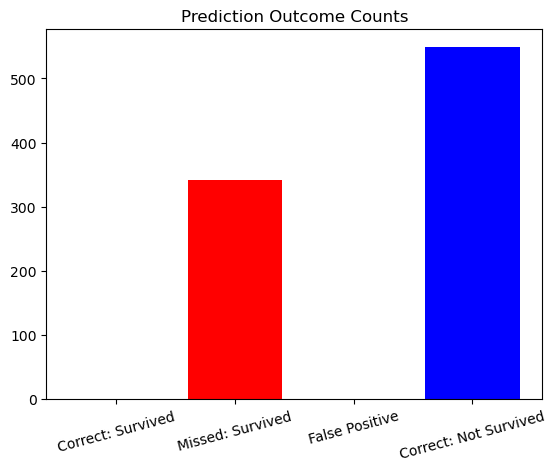

In [12]:
survived = df[(df['Survived'] == 1) & (df['Prediction'] == 1)].shape[0]
missed = df[(df['Survived'] == 1) & (df['Prediction'] == 0)].shape[0]
false_positive = df[(df['Survived'] == 0) & (df['Prediction'] == 1)].shape[0]
correct_negative = df[(df['Survived'] == 0) & (df['Prediction'] == 0)].shape[0]

labels = ['Correct: Survived', 'Missed: Survived', 'False Positive', 'Correct: Not Survived']
values = [survived, missed, false_positive, correct_negative]

plt.bar(labels, values, color=['green', 'red', 'orange', 'blue'])
plt.title("Prediction Outcome Counts")
plt.xticks(rotation=15)
plt.show()
